<a href="https://colab.research.google.com/github/Latamila/USP_Python_2/blob/main/Reais_Matrizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(exercício 2 da lista de exercícios sobre reais). Dado um número inteiro n>0
, determinar o número harmônico Hn
 dado por

 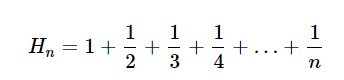

Imprima cada termo da sequência e o resultado final. Faça 2 implementações:

---
Da direita para a esquerda e

da esquerda para direita.

In [45]:
def main():
    n = int(input('digite o numero harmonico: '))
    m = int(input('digite quantas operações: '))
    harmonico_esquerda = n
    harmonico_direita = n
    for i in range(2, m+1):
        harmonico_esquerda += n/i
        print(f'+{n}/{i}={harmonico_esquerda}')
    print('++++++++++++++')
    for i in range(m,-1):
        harmonico_direita += n/i
        print(f'+{n}/{i}={harmonico_direita}')

main()

digite o numero harmonico: 1
digite quantas operações: 10
+1/2=1.5
+1/3=1.8333333333333333
+1/4=2.083333333333333
+1/5=2.283333333333333
+1/6=2.4499999999999997
+1/7=2.5928571428571425
+1/8=2.7178571428571425
+1/9=2.8289682539682537
+1/10=2.9289682539682538
++++++++++++++


In [46]:
def main():
    n = int(input('digite o numero harmonico: '))
    m = int(input('digite quantas operações: '))
    harmonico = n
    for i in range(m,0,-1):
        harmonico += n/i
        print(f'+{n}/{i}={harmonico}')

main()

digite o numero harmonico: 1
digite quantas operações: 10
+1/10=1.1
+1/9=1.2111111111111112
+1/8=1.3361111111111112
+1/7=1.478968253968254
+1/6=1.6456349206349208
+1/5=1.8456349206349207
+1/4=2.0956349206349207
+1/3=2.428968253968254
+1/2=2.928968253968254
+1/1=3.928968253968254


#Da direita para esquerda dá um maior resultado.

In [47]:
def fatorial(n):
  if n < 0:
    return 0
  i = fat = 1
  while i <= n:
    fat = fat * i
    i = i + 1
  return fat

#Funções trigonométricas

---
Apenas lembrando, as funções trigonométricas podem ser definidas como razões entre dois lados de um triângulo retângulo em função de um ângulo, ou, de forma mais geral, como razões de coordenadas de pontos no círculo unitário, ilustrado a seguir:

Comecemos importando as bibliotecas que usaremos. O papel de cada uma será explicado.


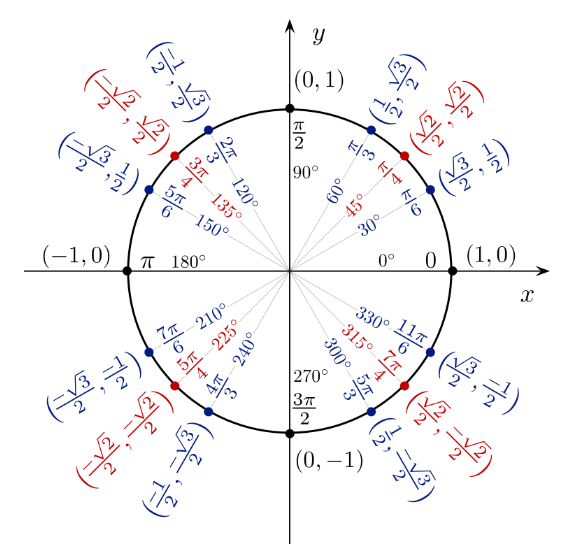

In [48]:
import sympy

from sympy import (sin, cos, tan, asin, acos, atan, sqrt, symbols, simplify,
                   trigsimp, log, exp, expand, expand_trig, Symbol, rad, deg,
                   sinh, cosh, tanh)

from sympy.plotting import (plot, plot3d, plot3d_parametric_line,
                            plot_implicit, plot3d_parametric_surface)

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

# configuração para outputs melhores no artigo, pode ser ignorado
sympy.init_printing(use_latex='png', scale=1.0, order='grlex',
                    forecolor='Black', backcolor='white')

Observe que importamos diretamente as funções trigonométricas do SymPy. Assim, as podemos chamar diretamente, sem precisar colocar `sympy.

In [49]:
sin(sympy.pi / 6)

1/2

In [50]:
cos(sympy.pi / 6)

√3
──
2 

In [51]:
tan(sympy.pi / 6)

√3
──
3 

A mesma linha de raciocínio vale para as demais funções trigonométricas: secante (sec), cossecante (csc) e cotangente (cot).

Caso não saiba o valor em radianos para um determinado ângulo, há a função rad do SymPy:

In [52]:
rad(30)

π
─
6

In [53]:
sin(rad(30))

1/2

Também há a função deg para obter o valor em graus de um ângulo em radianos:

In [54]:
deg(sympy.pi / 6)

30

#Funções inversas… e cuidado com floats

---
As funções inversas são também chamadas de funções arco. São as famosas arco seno, arco cosseno, arco tangente… Tais funções retornam o ângulo associado a um valor. Por exemplo, sabemos que o seno de 30° é 1/2. Logo, o arco cujo seno é 1/2 é 30° ou, em radianos, π/6. Vejamos, então, o resultado de asin(1/2):




In [55]:
asin(1/2)

0.523598775598299

Veja que o resultado não foi π/6. Ao menos não simbolicamente, o retorno foi uma aproximação numérica, um float, da divisão de pi por 6. Verifique na sua calculadora. Mas por quê? Já falamos do problema dos floats anteriormente:

De forma simplificada, quando passamos 1/2 estamos passando o float 0.5 que, internamente, não necessariamente corresponde à fração 1/2. Para o SymPy entender que você realmente quer a fração 1/2 e não sua representação aproximada em float, podemos passar na forma de uma string:


In [56]:
1/2

0.5

In [57]:
asin('1/2')

π
─
6

#Agora obtivemos o resultado esperado.

---
Como também vimos no primeiro artigo sobre o SymPy, em uma divisão, se um dos operandos for um objeto SymPy, toda a divisão vira um objeto SymPy. Por isso que a seguinte célula retorna um fração SymPy:

In [58]:
acos(sympy.sqrt(3)/2)

π
─
6

Aqui entra uma das grandes vantagens de se trabalhar simbolicamente. Lembra que quando havia uma raiz no denominador era preciso fazer um processo chamado de racionalização de denominadores? Quando passamos um objeto SymPy, ele cuida disso internamente. Veja que o resultado das duas seguintes células são iguais:

In [59]:
atan(1 / sympy.sqrt(3))

π
─
6

In [60]:
atan(sympy.sqrt(3) / 3)

π
─
6

#Identidades trigonométricas

---
Parte considerável do tempo de estudo de funções trigonométricas é dedidaca ao estudo de identidades. Há uma longa lista de identidades trigonométricas e certamente não vou apresentar todas aqui. O intuito é apenas demonstrar que o SymPy reconhece identidades trigonométricas com alguns exemplos.

Comecemos criando símbolos para nossas variáveis que vão representar os ângulos:

In [61]:
x, y = symbols('x y')

Comecemos demonstrando que o SymPy reconhece identidades referentes a ângulos complementares:

In [62]:
sin(x) == cos(x - sympy.pi/2)

True

In [63]:
expr = 2 * sin(x)**2 + 2 * cos(x)**2
expr

     2           2   
2⋅sin (x) + 2⋅cos (x)

In [64]:
trigsimp(expr)

2

In [65]:
#O mesmo vale para operações sobre expressões trigonométricas:
log(expr)

   ⎛     2           2   ⎞
log⎝2⋅sin (x) + 2⋅cos (x)⎠

In [66]:
log(expr).trigsimp()

log(2)

In [67]:
trigsimp(log(expr))

log(2)

In [68]:
params = {
    'lines.linewidth': 2.0,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'figure.autolayout': True,
    'figure.titlesize': 20,
    'figure.figsize': (10, 6),
    'legend.shadow': False,
    'legend.fontsize': 12,
}

plt.rcParams.update(params)

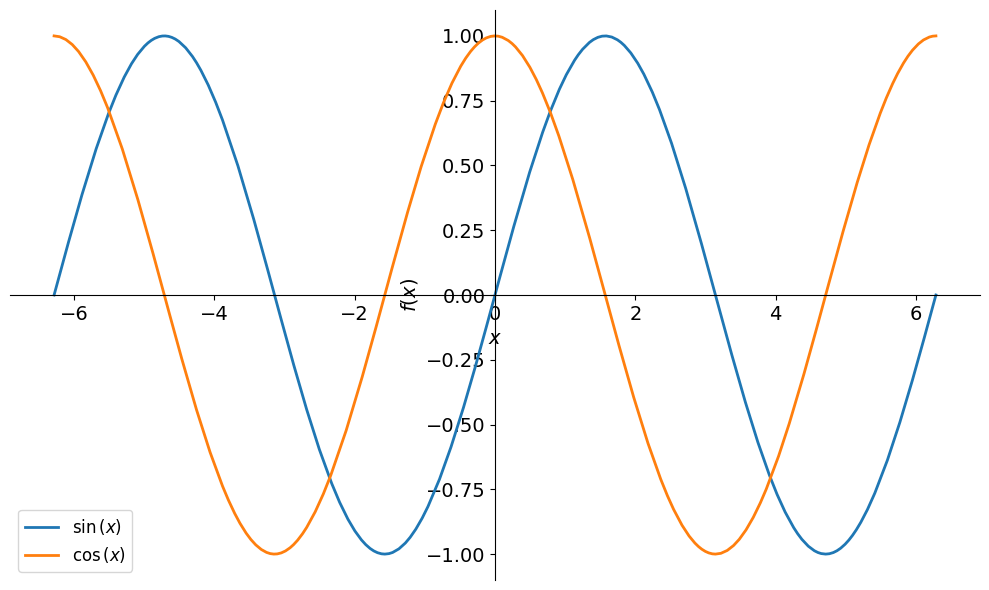

In [69]:
plot(sympy.sin(x), sympy.cos(x),    # funções
     (x, -2*sympy.pi, 2*sympy.pi),  # intervalo do gráfico
     legend=True);

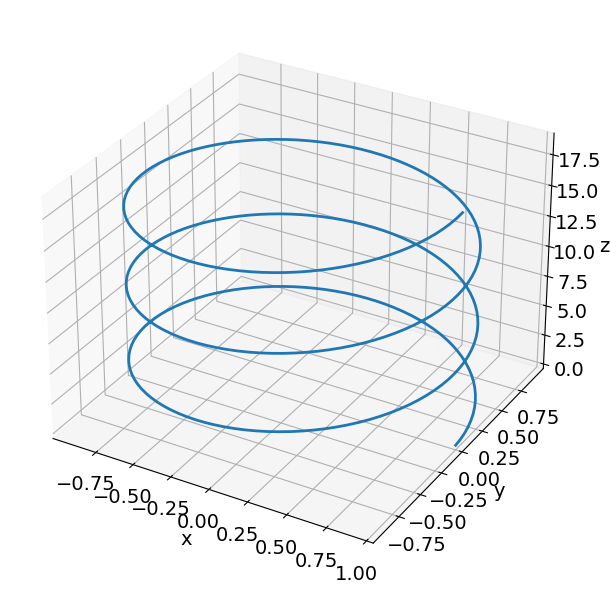

In [70]:
t = sympy.Symbol('t')

plot3d_parametric_line(cos(t),
                       sin(t),
                       t,
                       (t, 0, 6*sympy.pi),
                       );

Simples, não? É um comportamento periódico, olha ali as funções seno e cosseno.

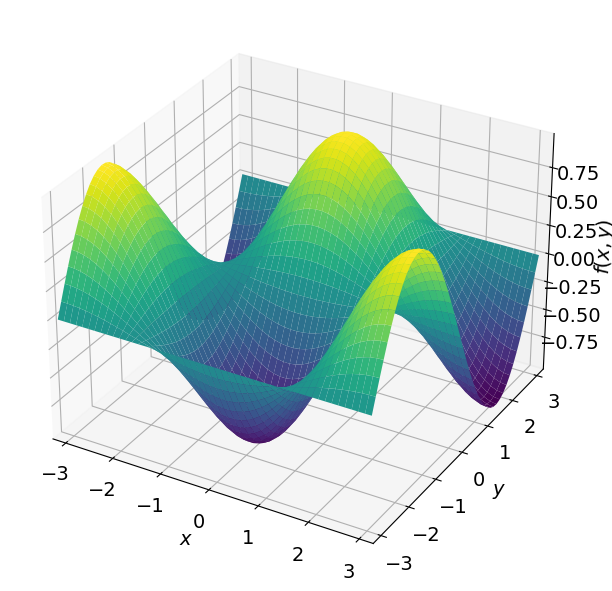

In [71]:
plot3d(sin(y) * cos(x),
       (x, -sympy.pi, sympy.pi),
       (y, -sympy.pi, sympy.pi),);

Consegue enxergá-lo como uma boa analogia à uma onda? Observe o comportamento de máximos e mínimos. Aqui os químicos e físicos talvez se recordem do exemplo mais clássico nessas áreas: orbitais atômicos. Sabe aqueles formatos de orbitais que fizeram você decorar no ensino médio? Olhe as equações no link, aparecem seno e cosseno nelas. Não por acaso, tais equações surgem da chamada função de onda estudada em quântica, mas isso é para detalhar em outro artigo.

Volte para a figura anterior. Imagine um plano paralelo ao plano xy e que corte o gráfico. Por exemplo, pegue um plano em z = 0.25, sendo z = f(x,y), nosso eixo vertical. O que você veria sobre esse plano? Como seria o gráfico dessa interseção, desse corte, entre a superfície e plano?

Bom, basicamente, estamos procurando o gráfico da equação sin(y) cos(x) = 0.25 concorda? Que é uma função implícita. Convenientemente, o SymPy possui o método plot_implicit para o qual podemos passar a equação e obter o gráfico:



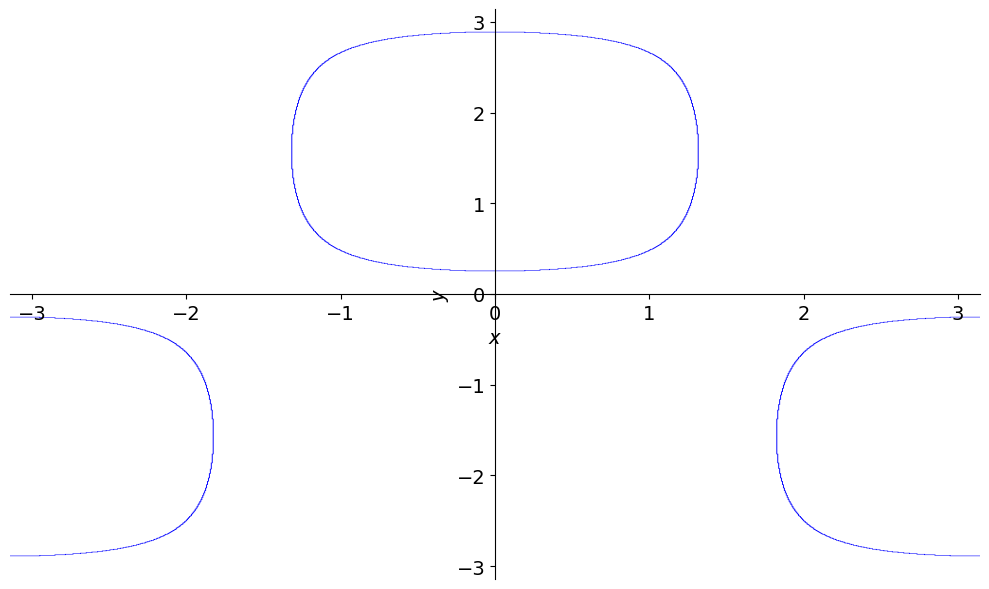

In [72]:
plot_implicit(sympy.Eq(sin(y) * cos(x), 0.25),
              (x, -sympy.pi, sympy.pi),
              (y, -sympy.pi, sympy.pi),
              );

In [78]:
math.cos(2)

-0.4161468365471424

Aqui estão os conceitos básicos:

---
- A função cos(x, n) calcula uma aproximação do cosseno de um número x usando uma técnica chamada série de Taylor. A série de Taylor é uma maneira de representar funções matemáticas como uma soma infinita de termos.

- math.factorial é uma função da biblioteca math que calcula o fatorial de um número. Fatorial é o produto de todos os inteiros positivos até aquele número. Por exemplo, math.factorial(3) é igual a 3 x 2 x 1 = 6.

- A função lambda define uma função pequena e anônima (sem nome) chamada formula que calcula cada termo na série de Taylor. Essa função depende do índice k.

- O código usa um loop for para calcular e acumular os termos da série de Taylor até o índice n.

- A soma acumulada é retornada como o resultado da função, que é uma aproximação do cosseno de x usando os primeiros n termos da série de Taylor.



In [77]:
import math

def cos(x, n):
    formula = lambda k: (-1)**k * x**(2*k) / math.factorial(2*k)
    soma = 0

    for k in range(n+1):
        soma += formula(k)

    return soma

def main():
    x = float(input('Digite o valor de x: '))  # Use float para permitir valores decimais
    n = int(input('Digite o valor de n: '))

    # Chama a função cos e armazena o resultado na variável 'cosseno'
    cosseno = cos(x, n)

    # Imprime o resultado
    print(f'O cosseno de {x} (calculado com {n} termos) é aproximadamente: {cosseno}')

    # Compara com a função cos da biblioteca math
    cosseno_math = math.cos(x)
    print(f'O cosseno de {x} (calculado com math.cos) é: {cosseno_math}')

# Verifica se o código está sendo executado como um script
if __name__ == '__main__':
    main()

Digite o valor de x: 2
Digite o valor de n: 6
O cosseno de 2.0 (calculado com 6 termos) é aproximadamente: -0.4161466517022073
O cosseno de 2.0 (calculado com math.cos) é: -0.4161468365471424


In [82]:
def sin(x, n):
    formula = lambda k: (-1)**k * x**(2*k+1) / math.factorial(2*k+1)
    soma = 0

    for k in range(n+1):
        soma += formula(k)

    return soma

def main():
    x = float(input('Digite o valor de x: '))  # Use float para permitir valores decimais
    n = int(input('Digite o valor de n: '))

    # Chama a função cos e armazena o resultado na variável 'cosseno'
    seno = sin(x, n)

    # Imprime o resultado
    print(f'O seno de {x} (calculado com {n} termos) é aproximadamente: {seno}')

    # Compara com a função cos da biblioteca math
    seno_math = math.sin(x)
    print(f'O cosseno de {x} (calculado com math.cos) é: {seno_math}')

# Verifica se o código está sendo executado como um script
if __name__ == '__main__':
    main()

Digite o valor de x: 2
Digite o valor de n: 6
O seno de 2.0 (calculado com 6 termos) é aproximadamente: 0.9092974515196738
O cosseno de 2.0 (calculado com math.cos) é: 0.9092974268256817


In [83]:
def main():
    x = float(input('digite o valor de x: '))

    print(f'O valor do cosseno de {x} é: {math.cos(x)}')
    print(f'O valor do seno de {x} é: {math.sin(x)}')

if __name__ == '__main__':
    main()

digite o valor de x: 2
O valor do cosseno de 2.0 é: -0.4161468365471424
O valor do seno de 2.0 é: 0.9092974268256817


Na figura, no plano cartesiano, a região sombreada não inclui as linhas de bordo. Note que o eixo y cai bem no meio da figura, e usamos o lado do quadrado para indicar as ordenadas correspondentes.

Escreva na página do desenho um programa que lê as coordenadas cartesianas (x, y) de um ponto, ambas do tipo float e imprime dentro se esse ponto está na região, e fora caso contrário.



---

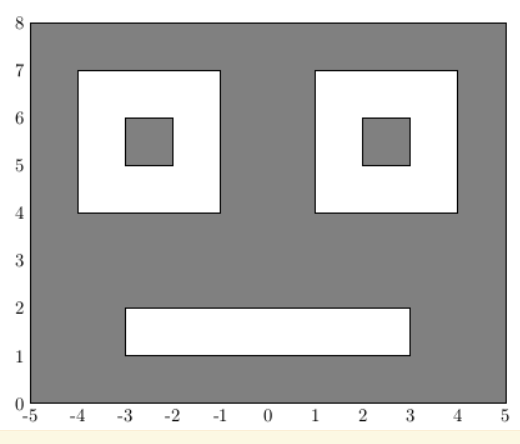

In [5]:
def verifica_regiao(x, y):
    # Define as condições para a primeira sub-região
    subregiao1 = (-4 <= x <= -1) and (4 <= y <= 7) and not (-3 <= x <= -2 and 5 <= y <= 6)

    # Define as condições para a segunda sub-região
    subregiao2 = (1 <= x <= 4) and (4 <= y <= 7) and not (2 <= x <= 3 and 5 <= y <= 6)

    # Define as condições para a terceira sub-região
    subregiao3 = (-3 <= x <= 3) and (1 <= y <= 2)

    # Verifica em qual sub-região o ponto está
    if subregiao1:
        print(f'O ponto ({x}, {y}) está fora')
    elif subregiao2:
        print(f'O ponto ({x}, {y}) está fora.')
    elif subregiao3:
        print(f'O ponto ({x}, {y}) está fora.')
    else:
        print(f'O ponto ({x}, {y}) está dentro.')

# Solicita ao usuário as coordenadas (x, y) do ponto
x = float(input('Digite a coordenada x do ponto: '))
y = float(input('Digite a coordenada y do ponto: '))

# Chama a função para verificar em qual sub-região o ponto está
verifica_regiao(x, y)


Digite a coordenada x do ponto: -4
Digite a coordenada y do ponto: 3
O ponto (-4.0, 3.0) está dentro.


In [6]:
#dado um numero real x e um numero real epsilon > 0
#calcular aproximação de e**x

import math

x = float(input('Digite o valor de x: '))
epsilon = float(input('digite o valor de epsilon: '))

def main():
    resultado_aproximado = 1 #o primeiro termo sempre é 1
    termo_atual = 1
    k = 1

    while abs(termo_atual) > epsilon:
        termo_atual = (x ** k) / math.factorial(k)
        resultado_aproximado += termo_atual
        k += 1

    return f'O resultado de exp({x}) com epsilon = {epsilon} = {resultado_aproximado}'

main()

Digite o valor de x: 3
digite o valor de epsilon: 2


'O resultado de exp(3.0) com epsilon = 2.0 = 1'

Faça uma função arctan que recebe o número real x∈[0,1]
 e devolve uma aproximação do arco tangente de x
 (em radianos) através da série incluindo todos os termos da série

In [7]:
import numpy as np

def arctan(n):
    arc = np.arctan(n)
    return arc

def main():
    n = float(input('Digite o valor: '))
    return arctan(n)
    pass

main()

Digite o valor: 0.9


0.7328151017865066

#SOMA DE MATRIZES

---

In [15]:
def cria_matriz(numero_linhas, numero_colunas, valor):
    matriz = []
    for i in range(numero_linhas):
        linha = []
        for j in range(numero_colunas):
            linha.append(valor)

        #adiciona linha à matriz
        matriz.append(linha)
    return matriz

In [18]:
def soma_matriz(A,B):
    num_linha = len(A)
    num_coluna = len(A[0])

    c = cria_matriz(num_linha, num_coluna, 0)

    for lin in range(0, num_linha):
        for col in range(num_coluna):
            c[lin][col] = A[lin][col] + B[lin][col]
    return c

In [19]:
A = [[1,2,3],[4,5,6],[7,8,9]]
B = [[10,20,30],[40,50,60],[70,80,90]]

print(soma_matriz(A,B))

[[11, 22, 33], [44, 55, 66], [77, 88, 99]]


In [20]:
if __name__ == '__main__':
    A = [[9,8,7],[6,5,4],[3,2,1]]
    B = [[10,20,30],[40,50,60],[70,80,90]]
    print(soma_matriz(A,B))

main()

[[19, 28, 37], [46, 55, 64], [73, 82, 91]]
Digite o valor: 3


1.2490457723982544

#MULTIPLICAÇÃO COM MATRIZES

---

In [21]:
from inspect import getcallargs
def getLinha(matriz, n):
    return [i for i in matriz[n]]

def getColuna(matriz, n):
    return [i[n] for i in matriz]

matriz1 = [[2,3],[4,6]]
mlinha1 = len(matriz1)
mcoluna1 = len(matriz1[0])

matriz2 = [[1,3,0],[2,1,1]]
mlinha2 = len(matriz2)
mcoluna2 = len(matriz2[0])

matRes = [] #a nova matriz terá numeros de linha da primeira matriz
# e a quantidade de colunas da segunda matriz, desde que
# o numero de colunas da primeira seja igual ao numero de
#linhas da segunda
for i in range(mlinha1):
    matRes.append([])
    for j in range(mcoluna2):
        #muktiplica cada de linha de matriz1 por cada coluna de matriz2
        listaMult = [x*y for x, y in zip(getLinha(matriz1, i), getColuna(matriz2,j))]
        #adiciona à matRes a listaMult
        matRes[i].append(sum(listaMult))

print(matRes)


[[8, 9, 3], [16, 18, 6]]


#Usando Classes para implementar

---

In [1]:
class Matriz:
    def __init__(self, mat):
        self.mat = mat
        self.lin = len(mat)
        self.col = len(mat[0])

    def getLinha(self, n):
        return [i for i in self.mat[n]]

    def getColuna(self, n):
        return [i[n] for i in self.mat]

    def __mul__(self, mat2):
        matRes = []

        for i in range(self.lin):
            matRes.append([])

            for j in range(mat2.col):
                listaMult = [x*y for x,y in zip(self.getLinha(i), mat2.getColuna(j))]
                matRes[i].append(sum(listaMult))

        return matRes

In [2]:
mat1 = Matriz([[2,3],[4,6]])
mat2 = Matriz([[1,3,0],[2,1,1]])
print(mat1*mat2)

[[8, 9, 3], [16, 18, 6]]


In [5]:
matriz1 = Matriz([[1,2,3],[4,5,6]])
matriz2 = Matriz([[1,2],[3,4],[5,6]])
print(matriz1*matriz2)

[[22, 28], [49, 64]]


In [9]:
import numpy as np

m = [[1,2,3],[4,5,6]]
n = [[1,2],[3,4],[5,6]]

m = np.array(m)
n = np.array(n)

matriz = np.matmul(m,n)

In [10]:
for n in matriz:
    print(n)

[22 28]
[49 64]


In [ ]:
import numpy as np

m = [[1,2,3],[4,5,6]]
n = [[1,2],[3,4],[5,6]]

m = np.array(m)
n = np.array(n)

matriz = np.matmul(m,n)

for linha in matriz:
    for n in linha:
        print(n)import numpy as np

m = [[1,2,3],[4,5,6]]
n = [[1,2],[3,4],[5,6]]

m = np.array(m)
n = np.array(n)

matriz = np.matmul(m,n)

for linha in matriz:
    for n in linha:
        print(n)